<a href="https://colab.research.google.com/github/KaushikPalani/CarPricePrediction/blob/main/CarPricePredictionRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction - Regression analysis

In [ ]:
import pandas as pd
import numpy as np

### Exploratory Data Analysis and Preprocessing

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.set_index('car_ID', inplace=True)

In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 17  bo

In [ ]:
# Retrieve the categorical columns
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [ ]:
for col in object_columns:
  print(df[col].value_counts())
  print("No of unique entries", df[col].nunique())
  print('\n')

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
No of unique entries 147


fueltype
gas       185
diesel     20
Name: count, dtype: int64
No of unique entries 2


aspiration
std      168
turbo     37
Name: count, dtype: int64
No of unique entries 2


doornumber
four    115
two      90
Name: count, dtype: int64
No of unique entries 2


carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
No of unique entries 5


drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
No of unique entries 3


enginelocation
front    202
rear       3
Name: count, dtype: int64
No of unique entries 2


enginetype
ohc      148
ohcf      15
ohcv 

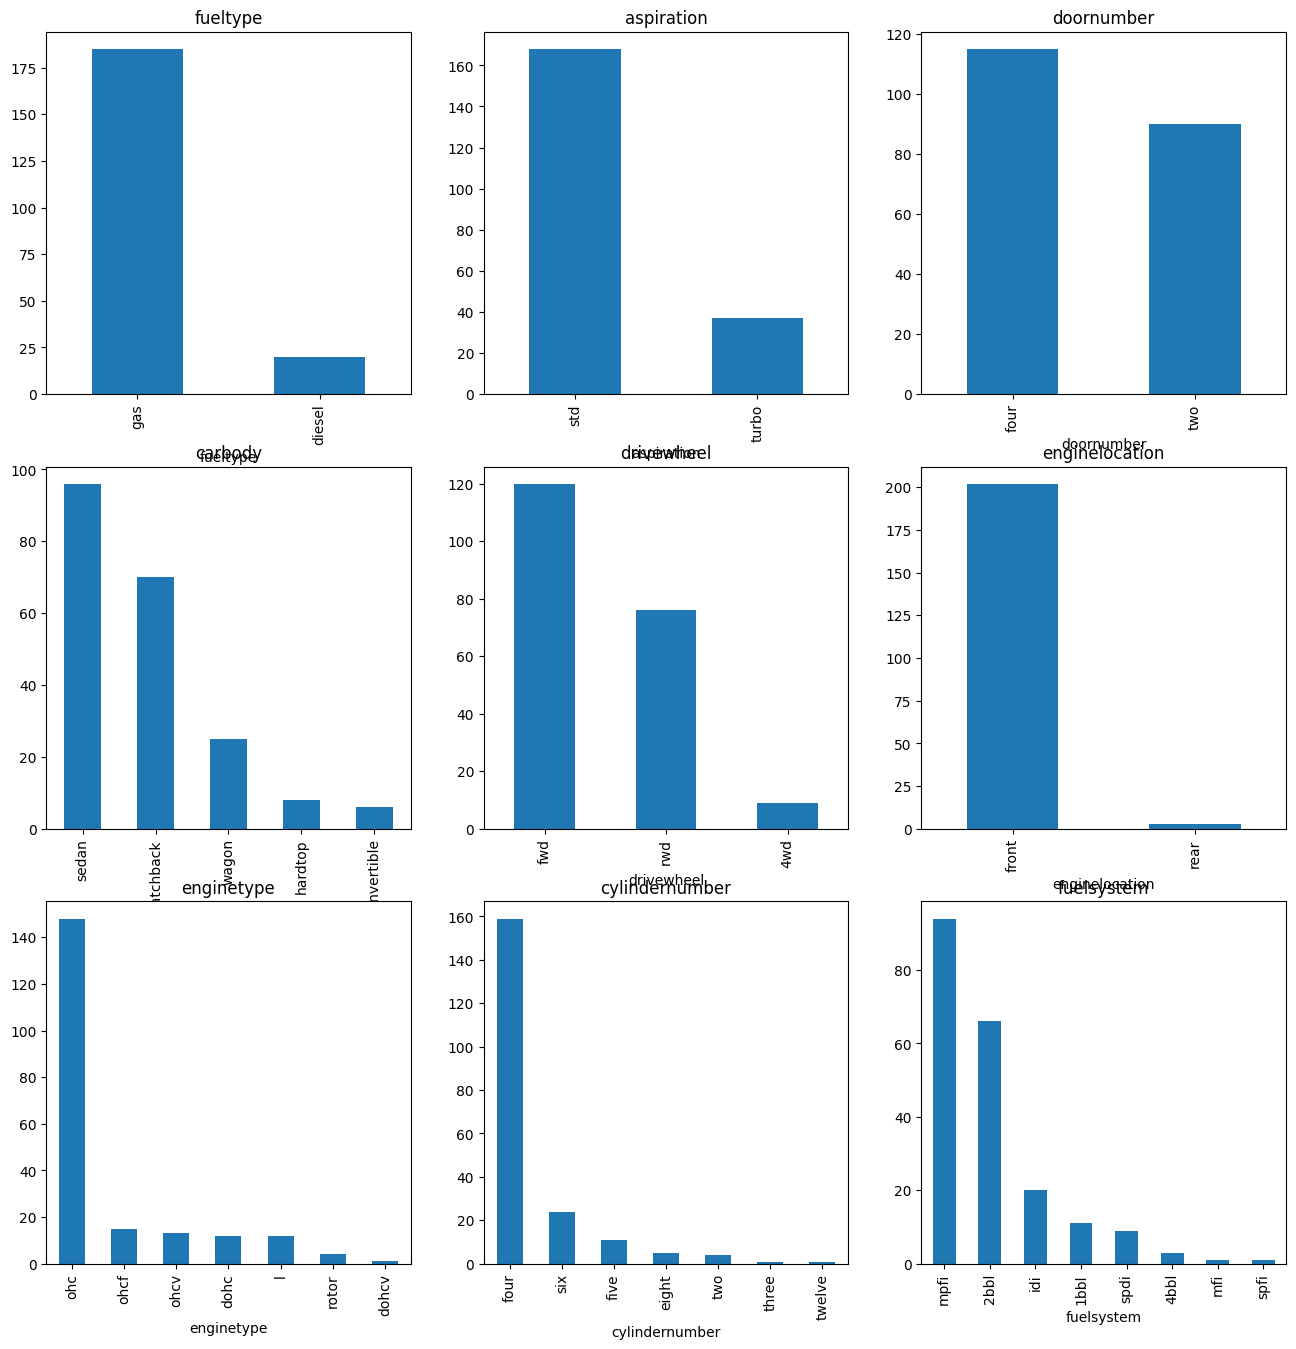

In [ ]:
plot_object_columns = object_columns.drop('CarName')

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
n = len(plot_object_columns)
for i in range(1, n+1):
    plt.subplot(3, 3, i)
    plt1 = df[plot_object_columns[i-1]].value_counts()
    plt1.plot(kind = 'bar')
    plt.title(plot_object_columns[i-1])

<Figure size 1000x500 with 0 Axes>

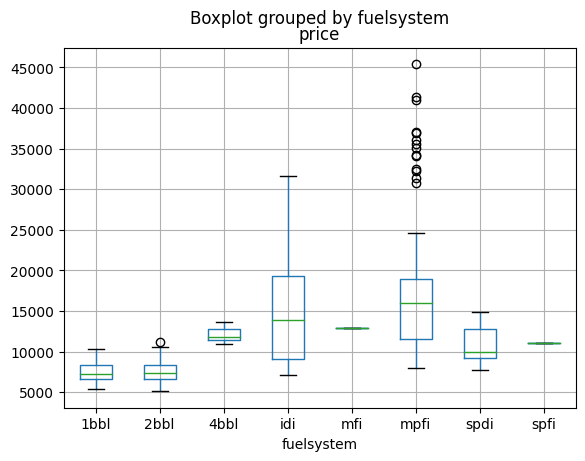

In [ ]:
# Box plots for fuelsystem

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df.boxplot(column='price', by='fuelsystem')
plt.show()


In [ ]:
# Squeeze mfi, spfi, 4bbl into idi since they have similar mean and less frequency
df.loc[df['fuelsystem'] == 'spfi', 'fuelsystem'] = 'idi'
df.loc[df['fuelsystem'] == '4bbl', 'fuelsystem'] = 'idi'
df.loc[df['fuelsystem'] == 'mfi', 'fuelsystem'] = 'idi'

<Figure size 1000x500 with 0 Axes>

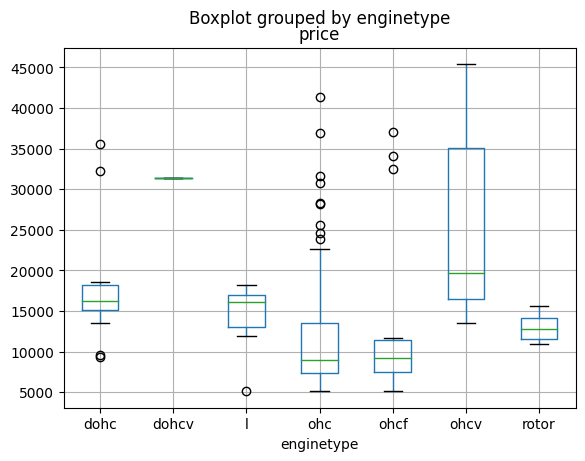

In [ ]:
# Box plots for enginetype

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df.boxplot(column='price', by='enginetype')
plt.show()

In [ ]:
# Squeeze dohcv to ohcv and rotor to I, since they have similar mean and less frequency
df.loc[df['enginetype'] == 'dohcv', 'enginetype'] = 'ohcv'
df.loc[df['enginetype'] == 'rotor', 'enginetype'] = 'I'

In [ ]:
# Drop engine location since it is heavily biased
df.drop('enginelocation', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 17  st

## Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

## Custom functions


In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
class CarNameTargetEncoding(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.mean_price_by_carname = None

  def fit(self, df, y=None):
    self.mean_price_by_carname = df.groupby('CarName')['price'].mean()
    noise = np.random.normal(scale=0.1, size=len(self.mean_price_by_carname))
    self.mean_price_by_carname += noise
    return self

  def transform(self, df):
    # Map the mean price to the car name column
    df['CarName_encoded'] = df['CarName'].map(self.mean_price_by_carname)
    df.drop('CarName', axis=1, inplace=True)
    return df

In [ ]:
class CylinderOrdinalEncoding(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.cylinder_mapping = None

  def fit(self, df, y=None):
    self.cylinder_mapping = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'twelve': 12, 'three': 3}
    return self

  def transform(self, df):
    df['cylindernumber_encoded'] = df['cylindernumber'].map(self.cylinder_mapping)
    df.drop('cylindernumber', axis=1, inplace=True)
    return df


In [ ]:
class OneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.column_names = None
        self.categories = {}

    def fit(self, df, y=None):
        self.column_names = df.select_dtypes(include='object').columns

        for col in self.column_names:
            self.categories[col] = df[col].unique()  # Store the unique categories

        return self

    def transform(self, df_org):
        df = df_org.copy()

        # For each categorical column, apply get_dummies, but only for the known categories
        for col in self.column_names:
            known_categories = self.categories[col]

            # Convert to dummies, only keeping columns for the known categories
            dummies = pd.get_dummies(df[col], prefix=col)
            known_dummies = [f"{col}_{category}" for category in known_categories]

            # Drop unknown categories by limiting dummies to known categories
            dummies = dummies.reindex(columns=known_dummies, fill_value=0)

            # Drop the original column and replace it with the dummies
            df = df.drop(columns=col).join(dummies)

        return df

In [ ]:
class CustomScaler(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.scaler = None

  def fit(self,df,Y=None):
    self.scaler = MinMaxScaler()
    self.scaler.fit(df)
    return self

  def transform(self, df):
    df_numpy = self.scaler.transform(df)
    df = pd.DataFrame(df_numpy, columns=df.columns)
    return df

In [ ]:
class OutlierRemoval(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.Q1 = None
    self.Q3 = None
    self.IQR = None

  def fit(self, df, y=None):
    df_out = df.select_dtypes(exclude='object')
    self.Q1 = df_out.quantile(0.25)
    self.Q3 = df_out.quantile(0.75)
    self.IQR = self.Q3 - self.Q1
    return self

  def transform(self, df):
    df_out = df.select_dtypes(exclude='object')
    df = df[~((df_out < (self.Q1 - 1.5 * self.IQR)) |(df_out > (self.Q3 + 1.5 * self.IQR))).any(axis=1)]
    return df

In [ ]:
def number_of_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).sum()
  return outliers

number_of_outliers(df.select_dtypes(exclude='object'))

,0
symboling,0
wheelbase,3
carlength,1
carwidth,8
carheight,0
curbweight,0
enginesize,10
boreratio,0
stroke,20
compressionratio,28


## Creating Pipeline


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
categorical_columns = df_train.select_dtypes(include='object').columns
categorical_columns = categorical_columns.drop('CarName')
numerical_columns = df_train.select_dtypes(exclude='object').columns

In [ ]:
pipeline = Pipeline(steps=[
    ('CarNameTargetEncoding', CarNameTargetEncoding()),
    ('OutlierRemoval', OutlierRemoval()),
    ('CylinderOrdinalEncoding', CylinderOrdinalEncoding()),
    ('encoder', OneHotEncoding()),
    ('scaler', CustomScaler())
])

In [ ]:
df_train = pipeline.fit_transform(df_train)
df_test = pipeline.transform(df_test)

<ipython-input-573-0c62582dd2ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylindernumber_encoded'] = df['cylindernumber'].map(self.cylinder_mapping)
<ipython-input-573-0c62582dd2ef>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('cylindernumber', axis=1, inplace=True)
<ipython-input-573-0c62582dd2ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

## Feature Selection


In [ ]:
X_train = df_train.drop('price', axis = 1)
y_train = df_train.price
X_test = df_test.drop('price', axis = 1)
y_test = df_test.price

In [ ]:
# Drop null
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

## Model Training


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'XGB Regression': XGBRegressor(),
    'KNN Rergressor': KNeighborsRegressor()
}

# Train and evaluate models
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
model_names = []
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  train_mse.append(mean_squared_error(y_train, y_pred_train))
  test_mse.append(mean_squared_error(y_test, y_pred_test))
  train_r2.append(r2_score(y_train, y_pred_train))
  test_r2.append(r2_score(y_test, y_pred_test))
  model_names.append(name)

In [ ]:
# prompt: Perform hyperparameter tuning with grid search

from sklearn.model_selection import GridSearchCV

# Example with Random Forest Regression
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Test MSE:", test_mse)
print("Test R2:", test_r2)


Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best score: -0.00815544158131001
Test MSE: 0.011278957959634125
Test R2: 0.6249020467198754


## Model Evaluation


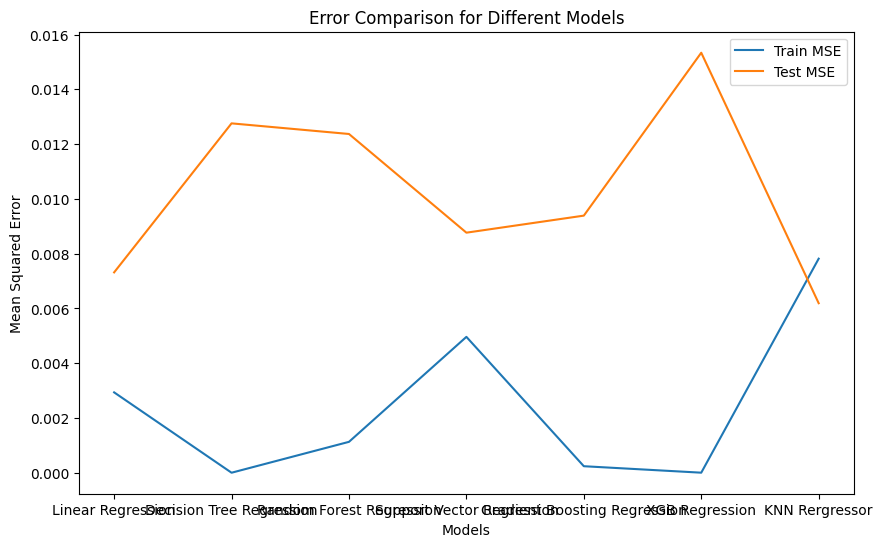

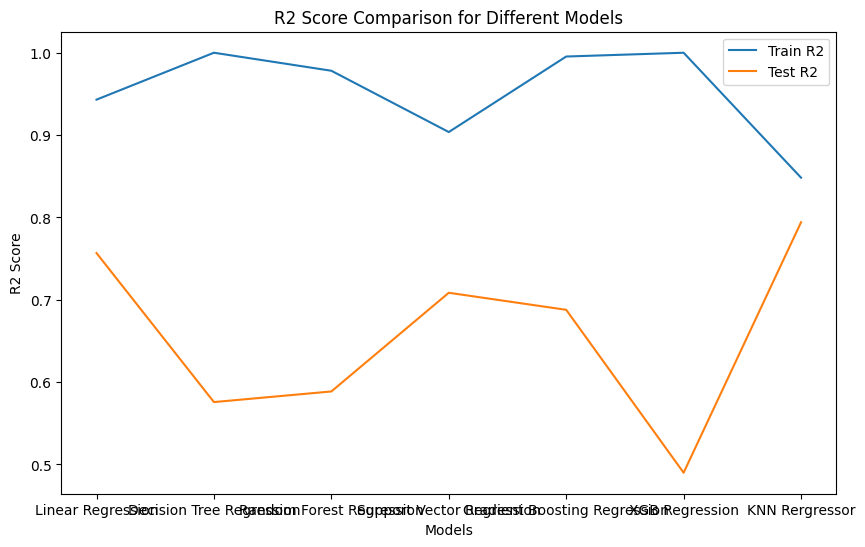

In [ ]:
 # Plotting the error
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_mse, label='Train MSE')
plt.plot(model_names, test_mse, label='Test MSE')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Error Comparison for Different Models')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(model_names, train_r2, label='Train R2')
plt.plot(model_names, test_r2, label='Test R2')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison for Different Models')
plt.legend()
plt.show()


Ref : https://anar-abiyev.medium.com/data-science-regression-project-example-8bf12f76a71

Dataset : https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/data?select=CarPrice_Assignment.csv